<a href="https://colab.research.google.com/github/GoreDhiraj/Github-portfolio-/blob/main/NLP_internship.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name - Dhiraj Shrikant Gore

Topic -Sentiment Analysis of comment/ feedback using nlp


Org name -Tata consultancy services


Institute name - B.K Birla college kalyan(w)


REVIEWS SENTIMENTS ANALYSIS ! :-)

Business Problem: ♾

One of the most important problems in e-commerce is the correct calculation of points. given to aftermarket products. Solving this problem means providing more. Customer satisfaction for e-commerce site, product prominence for sellers and a seamless shopping experience for buyers. Another problem is correct ordering. The prominence of misleading comments among the comments made on the products financial loss and loss of customers. That's why amazon company wants to rank reviews, and when ordering these reviews, they want to rank them according to their sentiment (positive / negative). In solving these 2 basic problems, e-commerce site and sellers will increase their sales, customers hassle-free purchasing journey.


In [ ]:
# Installing important libraries

In [ ]:
!pip install SentimentIntensityAnalyzer
!pip install chart_studio
!pip install TextBlob
!pip install plotly
!pip install WordCloud
!pip install cufflinks


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement SentimentIntensityAnalyzer (from versions: none)
ERROR: No matching distribution found for SentimentIntensityAnalyzer
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 KB 7.5 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 9.6 MB/s eta 0:00:00


In [ ]:

from warnings import filterwarnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, GridSearchCV, cross_validate
from sklearn.preprocessing import LabelEncoder
from textblob import Word, TextBlob
from wordcloud import WordCloud


filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 200)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

Reading and understanding the data

In [ ]:
df=pd.read_csv("amazon_reviews.csv")
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,day_diff,helpful_yes,total_vote
0,A3SBTW3WS4IQSN,B007WTAJTO,NaN,"[0, 0]",No issues.,4.00,Four Stars,1406073600,2014-07-23,138,0,0
1,A18K1ODH1I2MVB,B007WTAJTO,0mie,"[0, 0]","Purchased this for my device, it worked as adv...",5.00,MOAR SPACE!!!,1382659200,2013-10-25,409,0,0
2,A2FII3I2MBMUIA,B007WTAJTO,1K3,"[0, 0]",it works as expected. I should have sprung for...,4.00,nothing to really say....,1356220800,2012-12-23,715,0,0
3,A3H99DFEG68SR,B007WTAJTO,1m2,"[0, 0]",This think has worked out great.Had a diff. br...,5.00,Great buy at this price!!! *** UPDATE,1384992000,2013-11-21,382,0,0
4,A375ZM4U047O79,B007WTAJTO,2&amp;1/2Men,"[0, 0]","Bought it with Retail Packaging, arrived legit...",5.00,best deal around,1373673600,2013-07-13,513,0,0


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4915 entries, 0 to 4914
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   reviewerID      4915 non-null   object 
 1   asin            4915 non-null   object 
 2   reviewerName    4914 non-null   object 
 3   helpful         4915 non-null   object 
 4   reviewText      4914 non-null   object 
 5   overall         4915 non-null   float64
 6   summary         4915 non-null   object 
 7   unixReviewTime  4915 non-null   int64  
 8   reviewTime      4915 non-null   object 
 9   day_diff        4915 non-null   int64  
 10  helpful_yes     4915 non-null   int64  
 11  total_vote      4915 non-null   int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 460.9+ KB


1. Text Preprocessing

In [ ]:
# Normalizing Case Folding
df['reviewText'] = df['reviewText'].str.lower()

# Punctuations
df['reviewText'] = df['reviewText'].str.replace('[^\w\s]', '')

# Numbers
df['reviewText'] = df['reviewText'].str.replace('\d', '')

In [ ]:
import nltk
nltk.download('stopwords')
sw = stopwords.words('english')
df['reviewText'] = df['reviewText'].apply(lambda x: " ".join(x for x in str(x).split() if x not in sw))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Rarewords

drops = pd.Series(' '.join(df['reviewText']).split()).value_counts()[-1000:]
df['reviewText'] = df['reviewText'].apply(lambda x: " ".join(x for x in x.split() if x not in drops))

In [ ]:
# Tokenization
# nltk.download("punkt")
import nltk
nltk.download('punkt')
df["reviewText"].apply(lambda x: TextBlob(x).words).head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


0                                             [issues]
1    [purchased, device, worked, advertised, never,...
2    [works, expected, sprung, higher, capacity, th...
3    [think, worked, greathad, diff, bran, gb, card...
4    [bought, retail, packaging, arrived, legit, or...
Name: reviewText, dtype: object

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
# Lemmatization
#It is the process of breaking down words into their roots.
# nltk.download('wordnet')
df['reviewText'] = df['reviewText'].apply(lambda x: " ".join([Word(word).lemmatize()
for word in x.split()]))

df['reviewText'].head(10)

0                                                issue
1    purchased device worked advertised never much ...
2    work expected sprung higher capacity think mad...
3    think worked greathad diff bran gb card went s...
4    bought retail packaging arrived legit orange e...
5    mini storage doesnt anything else supposed pur...
6    phone never skip beat file transfer speedy cor...
7    hard believe affordable digital become gb devi...
8    work htc rezound running short space gb sandis...
9    galaxy super fast card totally happy happy sti...
Name: reviewText, dtype: object

2. Text Visualization

In [ ]:
#Calculation of Term Frequencies

tf = df["reviewText"].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()

tf.columns = ["words", "tf"]
tf.head()

,words,tf
0,issue,609.00
1,purchased,344.00
2,device,584.00
3,worked,460.00
4,advertised,111.00


In [ ]:
tf.shape


(8073, 2)

In [ ]:
tf["words"].nunique()

8073

In [ ]:
tf["words"].nunique()

8073

In [ ]:
tf["tf"].describe([0.05, 0.10, 0.25, 0.50, 0.75, 0.80, 0.90, 0.95, 0.99]).T


count   8073.00
mean      15.33
std       96.17
min        1.00
5%         1.00
10%        1.00
25%        1.00
50%        1.00
75%        4.00
80%        7.00
90%       20.00
95%       53.00
99%      262.56
max     5537.00
Name: tf, dtype: float64

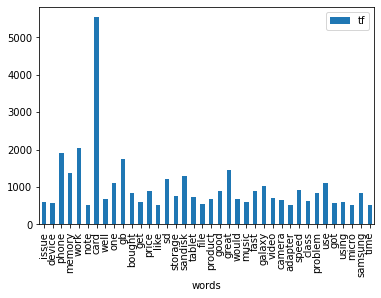

In [ ]:
# Barplot

tf[tf["tf"] > 500].plot.bar(x="words", y="tf")
plt.show()

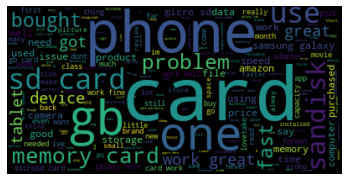

In [ ]:
# Wordcloud

text = " ".join(i for i in df.reviewText)
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

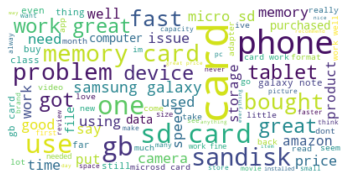

In [ ]:
# a lighter graphic
wordcloud = WordCloud(max_font_size=50,
                      max_words=100,
                      background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

wordcloud.to_file("wordcloud.png")


3. Sentiment Analysis

# NLTK already has a built-in, pretrained sentiment analyzer
# called VADER (Valence Aware Dictionary and sEntiment Reasoner)


In [ ]:
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,day_diff,helpful_yes,total_vote
0,A3SBTW3WS4IQSN,B007WTAJTO,NaN,"[0, 0]",issue,4.00,Four Stars,1406073600,2014-07-23,138,0,0
1,A18K1ODH1I2MVB,B007WTAJTO,0mie,"[0, 0]",purchased device worked advertised never much ...,5.00,MOAR SPACE!!!,1382659200,2013-10-25,409,0,0
2,A2FII3I2MBMUIA,B007WTAJTO,1K3,"[0, 0]",work expected sprung higher capacity think mad...,4.00,nothing to really say....,1356220800,2012-12-23,715,0,0
3,A3H99DFEG68SR,B007WTAJTO,1m2,"[0, 0]",think worked greathad diff bran gb card went s...,5.00,Great buy at this price!!! *** UPDATE,1384992000,2013-11-21,382,0,0
4,A375ZM4U047O79,B007WTAJTO,2&amp;1/2Men,"[0, 0]",bought retail packaging arrived legit orange e...,5.00,best deal around,1373673600,2013-07-13,513,0,0


In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
# nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

In [ ]:
sia.polarity_scores("The film was awesome")

{'neg': 0.0, 'neu': 0.423, 'pos': 0.577, 'compound': 0.6249}

In [ ]:
sia.polarity_scores("I liked this music but it is not good as the other one")

{'neg': 0.207, 'neu': 0.666, 'pos': 0.127, 'compound': -0.298}

In [ ]:
# For example, if we want to enlarge the reviews
df["reviewText"].apply(lambda x: x.upper())

0                                                   ISSUE
1       PURCHASED DEVICE WORKED ADVERTISED NEVER MUCH ...
2       WORK EXPECTED SPRUNG HIGHER CAPACITY THINK MAD...
3       THINK WORKED GREATHAD DIFF BRAN GB CARD WENT S...
4       BOUGHT RETAIL PACKAGING ARRIVED LEGIT ORANGE E...
                              ...                        
4910    BOUGHT SANDISK GB CLASS USE HTC INSPIRE MONTH ...
4911    USED EXTENDING CAPABILITY SAMSUNG GALAXY NOTE ...
4912    GREAT CARD FAST RELIABLE COME OPTIONAL ADAPTER...
4913           GOOD AMOUNT SPACE STUFF WANT FIT GOPRO SAY
4914    IVE HEARD BAD THING GB MICRO SD CARD CRAPPING ...
Name: reviewText, Length: 4915, dtype: object

In [ ]:

#Now let's calculate the scores for example 10 of them
df["reviewText"][0:10].apply(lambda x: sia.polarity_scores(x))

0    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
1    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
2    {'neg': 0.0, 'neu': 0.828, 'pos': 0.172, 'comp...
3    {'neg': 0.0, 'neu': 0.831, 'pos': 0.169, 'comp...
4    {'neg': 0.0, 'neu': 0.765, 'pos': 0.235, 'comp...
5    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
6    {'neg': 0.099, 'neu': 0.589, 'pos': 0.312, 'co...
7    {'neg': 0.066, 'neu': 0.703, 'pos': 0.231, 'co...
8    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
9    {'neg': 0.0, 'neu': 0.457, 'pos': 0.543, 'comp...
Name: reviewText, dtype: object

In [ ]:
#what if we want to select only one component from this dictionary?
df["reviewText"][0:10].apply(lambda x: sia.polarity_scores(x)["compound"])

0   0.00
1   0.00
2   0.40
3   0.65
4   0.86
5   0.00
6   0.90
7   0.82
8   0.00
9   0.92
Name: reviewText, dtype: float64

In [ ]:

#Let's do it permanently
df["polarity_score"] = df["reviewText"].apply(lambda x: sia.polarity_scores(x)["compound"])
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,day_diff,helpful_yes,total_vote,polarity_score
0,A3SBTW3WS4IQSN,B007WTAJTO,NaN,"[0, 0]",issue,4.00,Four Stars,1406073600,2014-07-23,138,0,0,0.00
1,A18K1ODH1I2MVB,B007WTAJTO,0mie,"[0, 0]",purchased device worked advertised never much ...,5.00,MOAR SPACE!!!,1382659200,2013-10-25,409,0,0,0.00
2,A2FII3I2MBMUIA,B007WTAJTO,1K3,"[0, 0]",work expected sprung higher capacity think mad...,4.00,nothing to really say....,1356220800,2012-12-23,715,0,0,0.40
3,A3H99DFEG68SR,B007WTAJTO,1m2,"[0, 0]",think worked greathad diff bran gb card went s...,5.00,Great buy at this price!!! *** UPDATE,1384992000,2013-11-21,382,0,0,0.65
4,A375ZM4U047O79,B007WTAJTO,2&amp;1/2Men,"[0, 0]",bought retail packaging arrived legit orange e...,5.00,best deal around,1373673600,2013-07-13,513,0,0,0.86


4. Sentiment Modeling

In [ ]:

#Creating Target
df["reviewText"][0:10].apply(lambda x: "pos" if sia.polarity_scores(x)["compound"] > 0 else "neg")

0    neg
1    neg
2    pos
3    pos
4    pos
5    neg
6    pos
7    pos
8    neg
9    pos
Name: reviewText, dtype: object

In [ ]:
#Now let's do the same for all the data and add a variable called sentiment_label to the dataset
df["sentiment_label"] = df["reviewText"].apply(lambda x: "pos" if sia.polarity_scores(x)["compound"] > 0 else "neg")
df.head(20)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,day_diff,helpful_yes,total_vote,polarity_score,sentiment_label
0,A3SBTW3WS4IQSN,B007WTAJTO,NaN,"[0, 0]",issue,4.00,Four Stars,1406073600,2014-07-23,138,0,0,0.00,neg
1,A18K1ODH1I2MVB,B007WTAJTO,0mie,"[0, 0]",purchased device worked advertised never much ...,5.00,MOAR SPACE!!!,1382659200,2013-10-25,409,0,0,0.00,neg
2,A2FII3I2MBMUIA,B007WTAJTO,1K3,"[0, 0]",work expected sprung higher capacity think mad...,4.00,nothing to really say....,1356220800,2012-12-23,715,0,0,0.40,pos
3,A3H99DFEG68SR,B007WTAJTO,1m2,"[0, 0]",think worked greathad diff bran gb card went s...,5.00,Great buy at this price!!! *** UPDATE,1384992000,2013-11-21,382,0,0,0.65,pos
4,A375ZM4U047O79,B007WTAJTO,2&amp;1/2Men,"[0, 0]",bought retail packaging arrived legit orange e...,5.00,best deal around,1373673600,2013-07-13,513,0,0,0.86,pos
5,A2IDCSC6NVONIZ,B007WTAJTO,2Cents!,"[0, 0]",mini storage doesnt anything else supposed pur...,5.00,Not a lot to really be said,1367193600,2013-04-29,588,0,0,0.00,neg
6,A26YHXZD5UFPVQ,B007WTAJTO,2K1Toaster,"[0, 0]",phone never skip beat file transfer speedy cor...,5.00,Works well,1382140800,2013-10-19,415,0,0,0.90,pos
7,A3CW0ZLUO5X2B1,B007WTAJTO,"35-year Technology Consumer ""8-tracks to 802.11""","[0, 0]",hard believe affordable digital become gb devi...,5.00,32 GB for less than two sawbucks...what's not ...,1404950400,2014-10-07,62,0,0,0.82,pos
8,A2CYJO155QP33S,B007WTAJTO,4evryoung,"[1, 1]",work htc rezound running short space gb sandis...,5.00,Loads of room,1395619200,2014-03-24,259,1,1,0.00,neg
9,A2S7XG3ZC4VGOQ,B007WTAJTO,53rdcard,"[0, 0]",galaxy super fast card totally happy happy sti...,5.00,works great,1381449600,2013-11-10,393,0,0,0.92,pos


In [ ]:
#do we have unbalanced data problem let's look at a class distribution
df["sentiment_label"].value_counts()

pos    3946
neg     969
Name: sentiment_label, dtype: int64

In [ ]:
#Another question I'm wondering is, is there any difference between the neg-pos labels in terms of the given points?
df.groupby("sentiment_label")["overall"].mean()

sentiment_label
neg   4.09
pos   4.71
Name: overall, dtype: float64

In [ ]:
# Target Encoding
df["sentiment_label"] = LabelEncoder().fit_transform(df["sentiment_label"])

X = df["reviewText"]
y = df["sentiment_label"]

In [ ]:
# ngram of my own comment for trail
a = """My son and family received the DVD player and they are delighted. Now my little grandson can play the Fireman Sam dvd's I bought him from the UK, not thinking about different regions. You have made a little three year old very happy as well as his Grandpa. My wishes for great sucess with your business."""

TextBlob(a).ngrams(3)

[WordList(['My', 'son', 'and']),
 WordList(['son', 'and', 'family']),
 WordList(['and', 'family', 'received']),
 WordList(['family', 'received', 'the']),
 WordList(['received', 'the', 'DVD']),
 WordList(['the', 'DVD', 'player']),
 WordList(['DVD', 'player', 'and']),
 WordList(['player', 'and', 'they']),
 WordList(['and', 'they', 'are']),
 WordList(['they', 'are', 'delighted']),
 WordList(['are', 'delighted', 'Now']),
 WordList(['delighted', 'Now', 'my']),
 WordList(['Now', 'my', 'little']),
 WordList(['my', 'little', 'grandson']),
 WordList(['little', 'grandson', 'can']),
 WordList(['grandson', 'can', 'play']),
 WordList(['can', 'play', 'the']),
 WordList(['play', 'the', 'Fireman']),
 WordList(['the', 'Fireman', 'Sam']),
 WordList(['Fireman', 'Sam', 'dvd']),
 WordList(['Sam', 'dvd', "'s"]),
 WordList(['dvd', "'s", 'I']),
 WordList(["'s", 'I', 'bought']),
 WordList(['I', 'bought', 'him']),
 WordList(['bought', 'him', 'from']),
 WordList(['him', 'from', 'the']),
 WordList(['from', 'the',

In [ ]:
# Count Vectors

from sklearn.feature_extraction.text import CountVectorizer

corpus = ['This is the first document.',
          'This document is the second document.',
          'And this is the third one.',
          'Is this the first document?']

In [ ]:
# word frequency
vectorizer = CountVectorizer()
X_c = vectorizer.fit_transform(corpus)
vectorizer.get_feature_names()
X_c.toarray()

array([[0, 1, 1, 1, 0, 0, 1, 0, 1],
       [0, 2, 0, 1, 0, 1, 1, 0, 1],
       [1, 0, 0, 1, 1, 0, 1, 1, 1],
       [0, 1, 1, 1, 0, 0, 1, 0, 1]])

In [ ]:
# n-gram frequency
vectorizer2 = CountVectorizer(analyzer='word', ngram_range=(2, 2))
X_n = vectorizer2.fit_transform(corpus)
vectorizer2.get_feature_names()
X_n.toarray()

array([[0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0],
       [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0],
       [0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1]])

In [ ]:
# Application of the frequency
vectorizer = CountVectorizer()
X_count = vectorizer.fit_transform(X)

vectorizer.get_feature_names()[10:15]
X_count.toarray()[10:15]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

TF-IDF


TF-IDF stands for term frequency-inverse document frequency and it is a measure, used in the fields of information retrieval (IR) and machine learning, that can quantify the importance or relevance of string representations (words, phrases, lemmas, etc)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(analyzer='word')
X_w = vectorizer.fit_transform(corpus)
vectorizer.get_feature_names()
X_w.toarray()

array([[0.        , 0.46979139, 0.58028582, 0.38408524, 0.        ,
        0.        , 0.38408524, 0.        , 0.38408524],
       [0.        , 0.6876236 , 0.        , 0.28108867, 0.        ,
        0.53864762, 0.28108867, 0.        , 0.28108867],
       [0.51184851, 0.        , 0.        , 0.26710379, 0.51184851,
        0.        , 0.26710379, 0.51184851, 0.26710379],
       [0.        , 0.46979139, 0.58028582, 0.38408524, 0.        ,
        0.        , 0.38408524, 0.        , 0.38408524]])

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range=(2, 3))
X_n = vectorizer.fit_transform(corpus)
vectorizer.get_feature_names()
X_n.toarray()

array([[0.        , 0.        , 0.        , 0.        , 0.37102749,
        0.30037873, 0.47060133, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.37102749, 0.37102749, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.37102749, 0.37102749, 0.        , 0.        ],
       [0.        , 0.        , 0.34488069, 0.34488069, 0.        ,
        0.22013288, 0.        , 0.34488069, 0.        , 0.        ,
        0.        , 0.34488069, 0.        , 0.        , 0.34488069,
        0.34488069, 0.        , 0.        , 0.        , 0.34488069,
        0.34488069, 0.        , 0.        , 0.        , 0.        ],
       [0.36153669, 0.36153669, 0.        , 0.        , 0.        ,
        0.23076418, 0.        , 0.        , 0.36153669, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.36153669, 0.36153669, 0.36153669, 0.        ,
        0.        , 0.28503968, 0.28503968, 0.

In [ ]:
# Application
tf_idf_word_vectorizer = TfidfVectorizer()
X_tf_idf_word = tf_idf_word_vectorizer.fit_transform(X)

5. Modeling

In [ ]:
# Logistic Regression

log_model = LogisticRegression().fit(X_tf_idf_word, y)

cross_val_score(log_model,
                X_tf_idf_word,
                y, scoring="accuracy",
                cv=5).mean()

yeni_yorum = pd.Series("this product is great")
yeni_yorum = pd.Series("look at that shit very bad")
yeni_yorum = pd.Series("it was good but I am sure that it fits me")

yeni_yorum = CountVectorizer().fit(X).transform(yeni_yorum)
log_model.predict(yeni_yorum)

array([1])

In [ ]:
#Can we ask the model to review the original comments?
random_review = pd.Series(df["reviewText"].sample(1).values)
random_review

0    wouldnt trade anything need extra space helpfu...
dtype: object

In [ ]:
yeni_yorum = CountVectorizer().fit(X).transform(random_review)
log_model.predict(yeni_yorum)

array([1])

Random Forests

In [ ]:
# Count Vectors
rf_model = RandomForestClassifier().fit(X_count, y)
cross_val_score(rf_model, X_count, y, cv=5, n_jobs=-1).mean()

0.8331637843336723

In [ ]:
#TF-IDF Word-Level
rf_model = RandomForestClassifier().fit(X_tf_idf_word, y)
cross_val_score(rf_model, X_tf_idf_word, y, cv=5, n_jobs=-1).mean()

0.8213631739572737

In [ ]:
# TF-IDF N-GRAM
#rf_model = RandomForestClassifier().fit(X_tf_idf_ngram, y)
#cross_val_score(rf_model, X_tf_idf_ngram, y, cv=5, n_jobs=-1).mean()

In [ ]:
#Hyperparameter Optimization

rf_model =RandomForestClassifier(random_state=17)

rf_params = {"max_depth": [5, 8, None],
             "max_features": [5, 7, "auto"],
             "min_samples_split": [2, 5, 8, 20],
             "n_estimators": [100, 200, 500]}

rf_best_grid = GridSearchCV(rf_model,
                            rf_params,
                            cv=5,
                            n_jobs=-1,
                            verbose=True).fit(X_count, y)

rf_best_grid.best_params_

rf_final = rf_model.set_params(**rf_best_grid.best_params_, random_state=17).fit(X_count, y)

cv_results = cross_validate(rf_final, X_count, y, cv=3, scoring=["accuracy", "f1", "roc_auc"])

Fitting 5 folds for each of 108 candidates, totalling 540 fits


In [ ]:
rf_best_grid.best_params_

{'max_depth': None,
 'max_features': 'auto',
 'min_samples_split': 2,
 'n_estimators': 100}

In [ ]:
rf_final = rf_model.set_params(**rf_best_grid.best_params_, random_state=17).fit(X_count, y)

In [ ]:
cv_results = cross_validate(rf_final, X_count, y, cv=3, scoring=["accuracy", "f1", "roc_auc"])
df2= pd.DataFrame(cv_results)
print(df2)